# Exploratory Data Analysis: Wearable Health Device Data

This notebook analyzes data collected from wearable health devices (fitness trackers, smartwatches, etc.) to understand patterns and prepare features for health risk prediction models.

## Objectives:
1. Load and explore wearable device data
2. Analyze distributions and correlations
3. Identify patterns related to health conditions
4. Feature engineering and preparation
5. Data quality checks


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from pathlib import Path
import sys

# Add src to path
sys.path.append(str(Path().absolute().parent / "src"))

warnings.filterwarnings('ignore')

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
%matplotlib inline

print("Libraries imported successfully!")


Libraries imported successfully!


In [ ]:
# Load data
data_dir = Path().absolute().parent / "data" / "raw"
wearable_file = data_dir / "wearable_data.csv"

if wearable_file.exists():
    df = pd.read_csv(wearable_file, parse_dates=['timestamp'])
    print(f"✓ Loaded {len(df)} records")
else:
    print("Data file not found. Running data collection...")
    from data_ingestion.collect_data import collect_all_data, load_config
    config = load_config()
    collect_all_data(config)
    df = pd.read_csv(wearable_file, parse_dates=['timestamp'])
    print(f"✓ Loaded {len(df)} records")

print(f"\nDataset shape: {df.shape}")
print(f"Date range: {df['timestamp'].min()} to {df['timestamp'].max()}")


✓ Loaded 3000 records

Dataset shape: (3000, 10)
Date range: 2025-10-16 17:51:18.948531 to 2025-11-14 17:51:19.564866


In [ ]:
# Display first few rows
df.head(10)


,user_id,timestamp,heart_rate,steps,sleep_hours,calories,body_temperature,stress_level,health_condition,node_id
0,0,2025-10-16 17:51:18.948531,62.8,7723,8.47,1000,36.55,45.1,normal,0
1,0,2025-10-17 17:51:18.948531,68.2,9534,6.80,1000,36.51,38.9,normal,0
2,0,2025-10-18 17:51:18.948531,61.6,4173,4.91,1000,36.40,53.9,normal,0
3,0,2025-10-19 17:51:18.948531,60.0,5175,9.70,1000,36.61,28.6,normal,0
4,0,2025-10-20 17:51:18.948531,60.0,8221,5.77,1000,36.48,45.6,normal,0
5,0,2025-10-21 17:51:18.948531,60.0,11704,7.48,1000,36.76,31.7,normal,0
6,0,2025-10-22 17:51:18.948531,61.4,4080,5.51,1000,36.75,51.9,normal,0
7,0,2025-10-23 17:51:18.948531,60.0,7397,5.28,1000,36.51,65.9,normal,0
8,0,2025-10-24 17:51:18.948531,62.1,4473,7.99,1000,36.46,58.1,normal,0
9,0,2025-10-25 17:51:18.948531,65.5,9862,6.24,1000,36.67,61.9,normal,0


In [ ]:
# Basic info and statistics
print("Dataset Info:")
print(df.info())
print("\n" + "="*60)
print("\nBasic Statistics:")
print(df.describe())
print("\n" + "="*60)
print("\nMissing Values:")
print(df.isnull().sum())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   user_id           3000 non-null   int64         
 1   timestamp         3000 non-null   datetime64[ns]
 2   heart_rate        3000 non-null   float64       
 3   steps             3000 non-null   int64         
 4   sleep_hours       3000 non-null   float64       
 5   calories          3000 non-null   int64         
 6   body_temperature  3000 non-null   float64       
 7   stress_level      3000 non-null   float64       
 8   health_condition  3000 non-null   object        
 9   node_id           3000 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(4), object(1)
memory usage: 234.5+ KB
None


Basic Statistics:
           user_id                      timestamp   heart_rate         steps  \
count  3000.000000                         

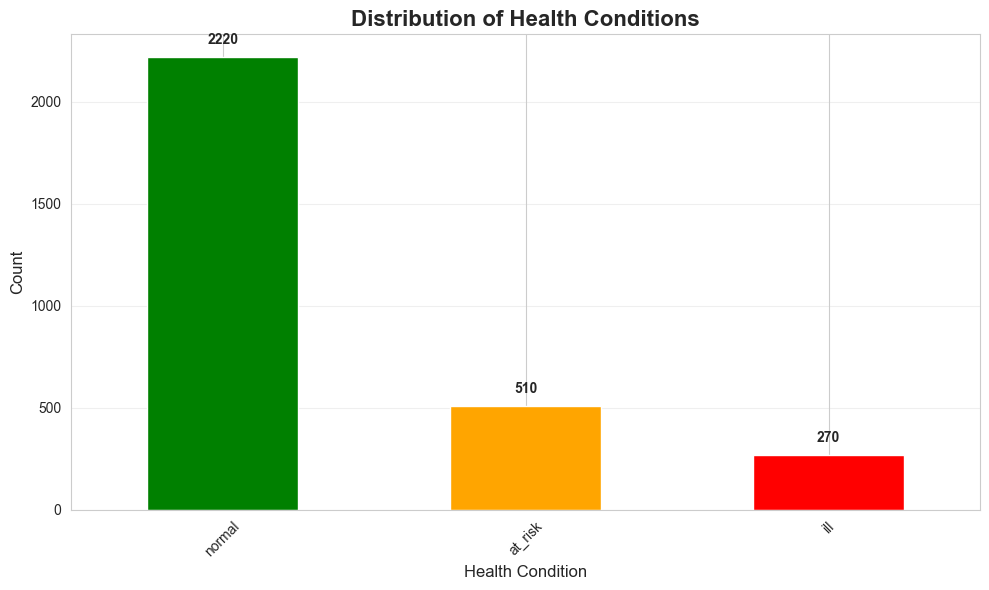


Health Condition Distribution:
health_condition
normal     2220
at_risk     510
ill         270
Name: count, dtype: int64

Percentage:
health_condition
normal     74.0
at_risk    17.0
ill         9.0
Name: count, dtype: float64


In [ ]:
# Distribution of health conditions
plt.figure(figsize=(10, 6))
health_counts = df['health_condition'].value_counts()
colors = {'normal': 'green', 'at_risk': 'orange', 'ill': 'red'}

ax = health_counts.plot(kind='bar', color=[colors.get(x, 'gray') for x in health_counts.index])
plt.title('Distribution of Health Conditions', fontsize=16, fontweight='bold')
plt.xlabel('Health Condition', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, v in enumerate(health_counts.values):
    ax.text(i, v + 50, str(v), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\nHealth Condition Distribution:")
print(health_counts)
print(f"\nPercentage:")
print((health_counts / len(df) * 100).round(2))


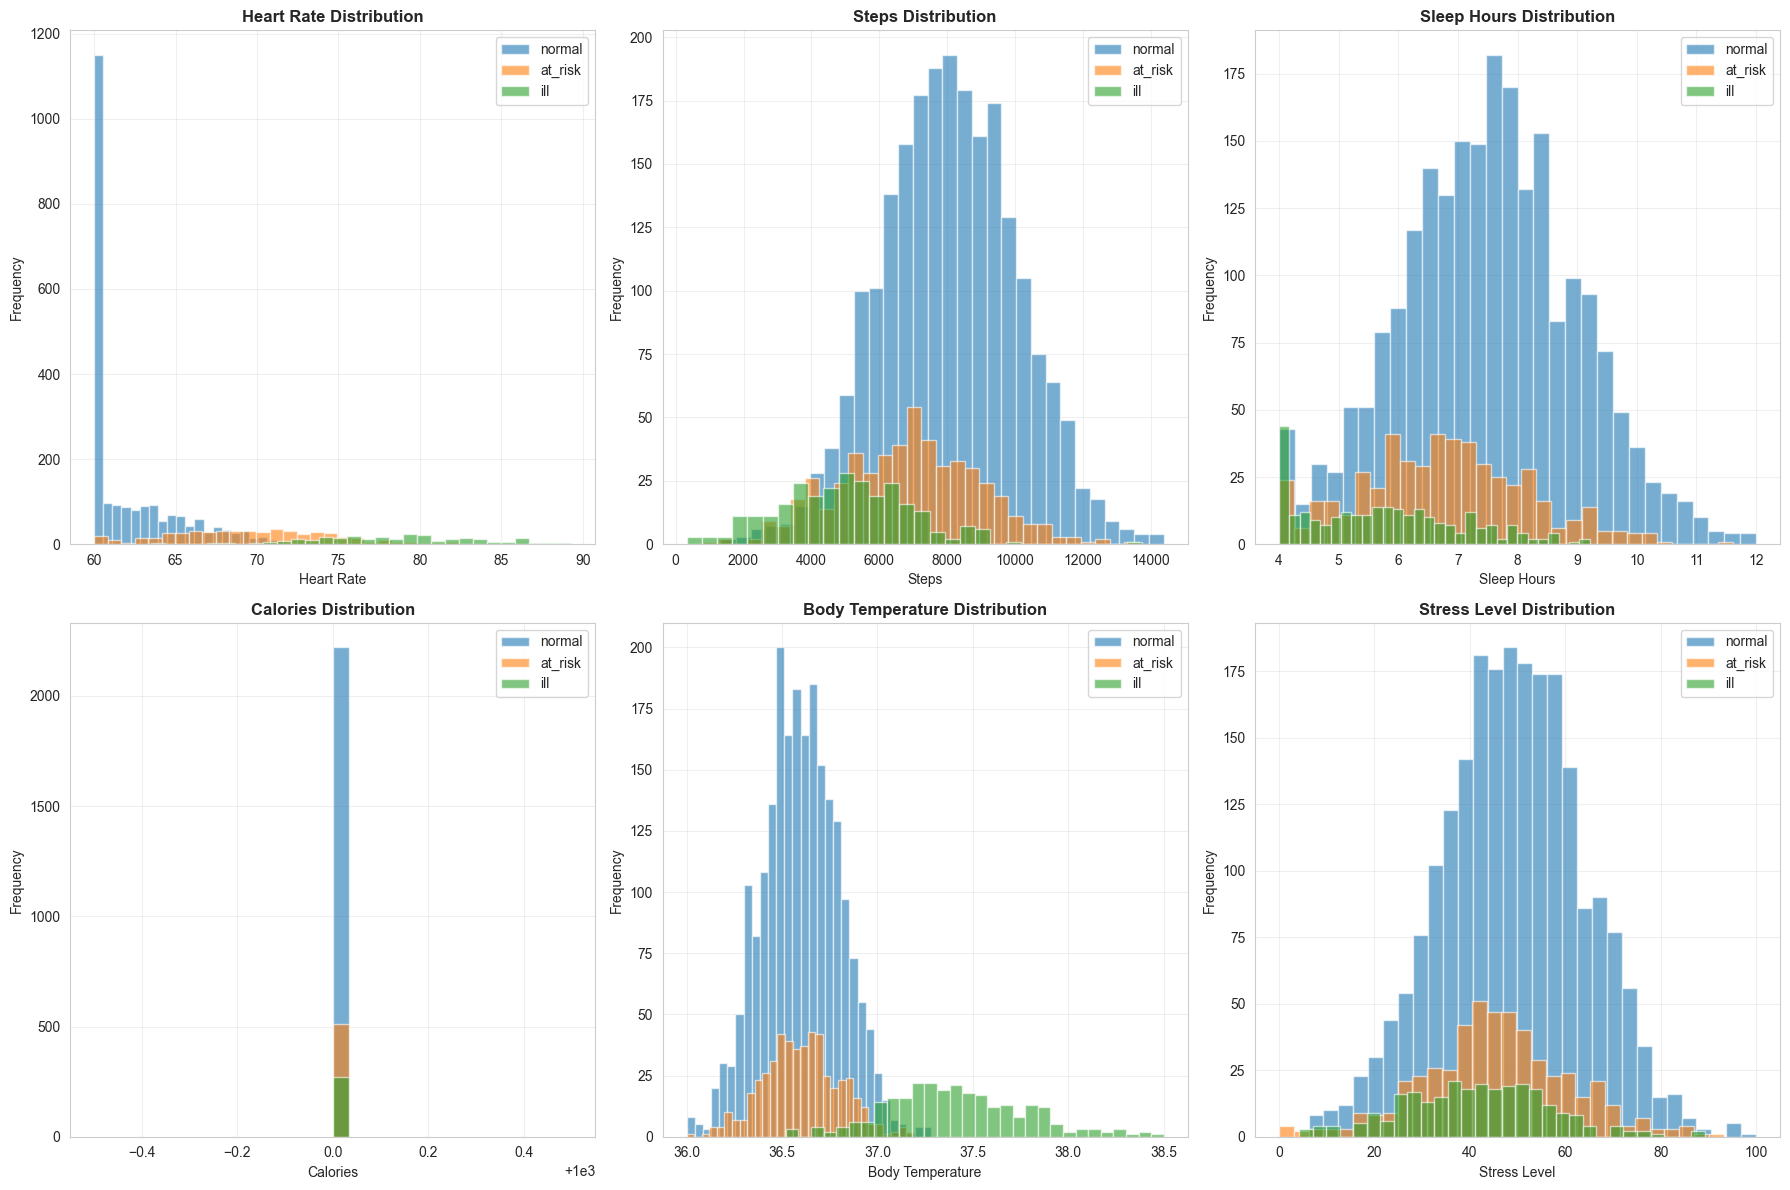

In [ ]:
# Feature distributions by health condition
numeric_features = ['heart_rate', 'steps', 'sleep_hours', 'calories', 
                    'body_temperature', 'stress_level']

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for idx, feature in enumerate(numeric_features):
    ax = axes[idx]
    for condition in df['health_condition'].unique():
        condition_data = df[df['health_condition'] == condition][feature]
        ax.hist(condition_data, alpha=0.6, label=condition, bins=30)
    ax.set_title(f'{feature.replace("_", " ").title()} Distribution', fontweight='bold')
    ax.set_xlabel(feature.replace("_", " ").title())
    ax.set_ylabel('Frequency')
    ax.legend()
    ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()


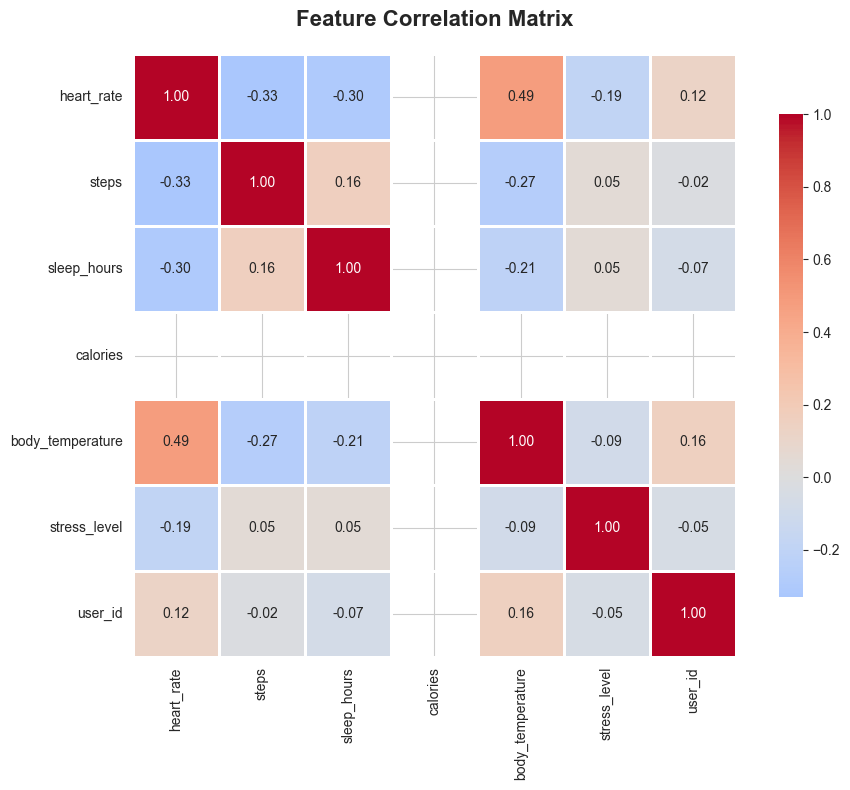

In [ ]:
# Correlation matrix
correlation_features = numeric_features + ['user_id']
corr_matrix = df[correlation_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Matrix', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()


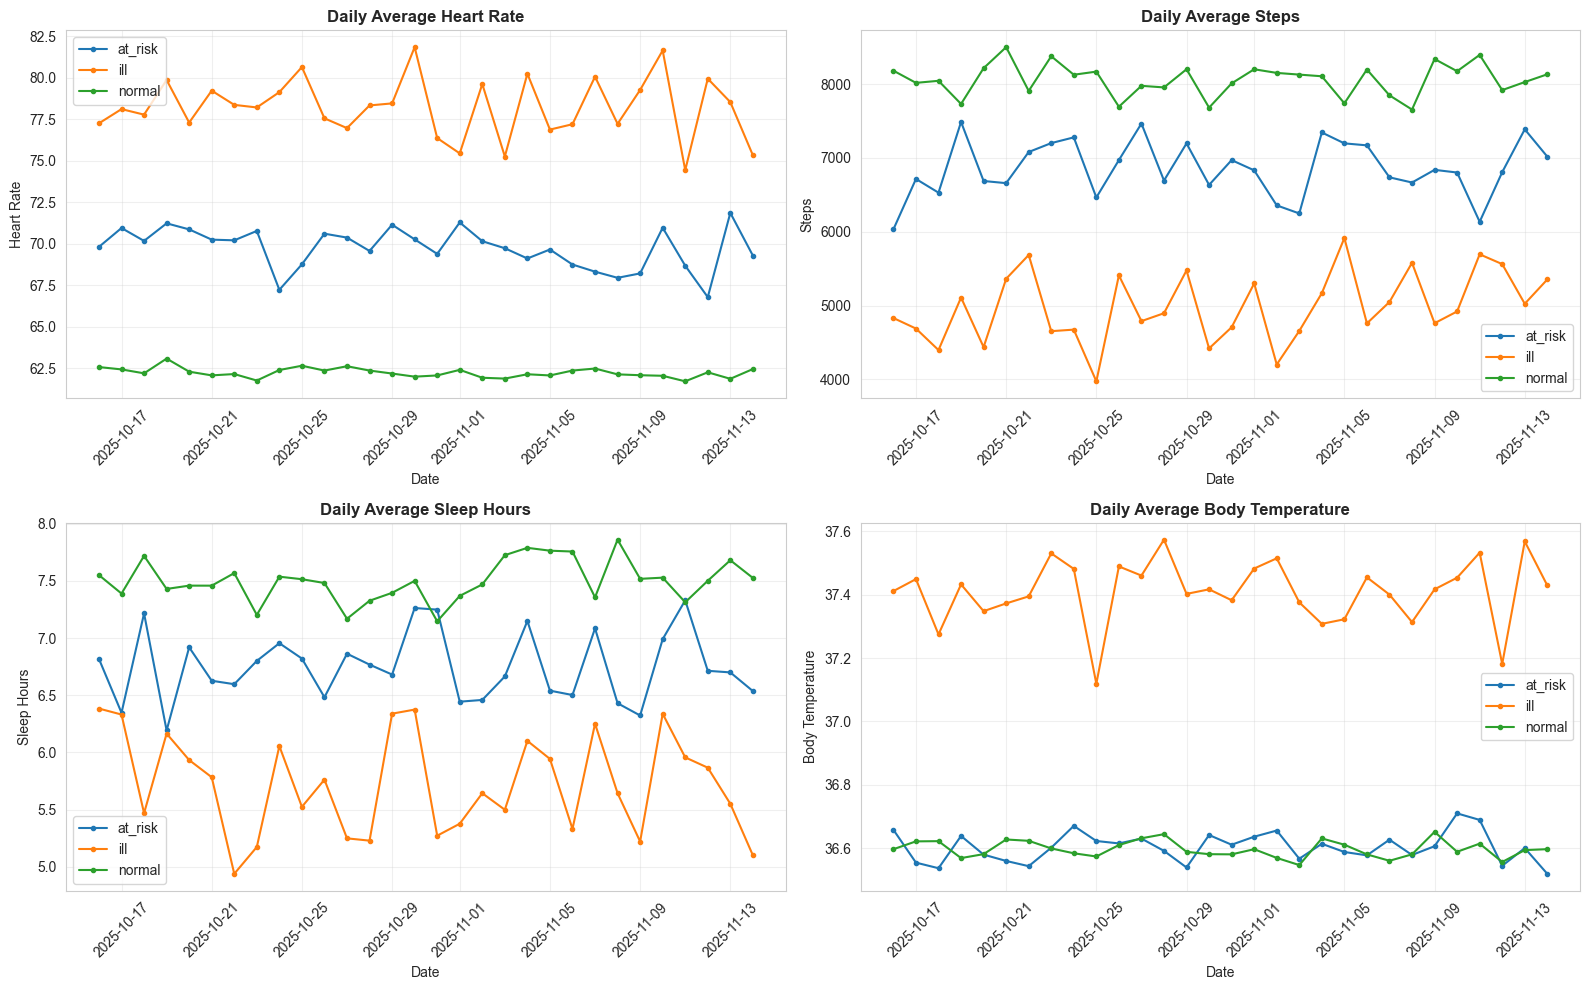

In [ ]:
# Time series analysis - Average metrics over time
df['date'] = df['timestamp'].dt.date
daily_avg = df.groupby(['date', 'health_condition']).agg({
    'heart_rate': 'mean',
    'steps': 'mean',
    'sleep_hours': 'mean',
    'body_temperature': 'mean'
}).reset_index()

fig, axes = plt.subplots(2, 2, figsize=(16, 10))
metrics = ['heart_rate', 'steps', 'sleep_hours', 'body_temperature']

for idx, metric in enumerate(metrics):
    ax = axes[idx // 2, idx % 2]
    for condition in daily_avg['health_condition'].unique():
        condition_data = daily_avg[daily_avg['health_condition'] == condition]
        ax.plot(condition_data['date'], condition_data[metric], 
                label=condition, marker='o', markersize=3)
    ax.set_title(f'Daily Average {metric.replace("_", " ").title()}', fontweight='bold')
    ax.set_xlabel('Date')
    ax.set_ylabel(metric.replace("_", " ").title())
    ax.legend()
    ax.grid(alpha=0.3)
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)

plt.tight_layout()
plt.show()


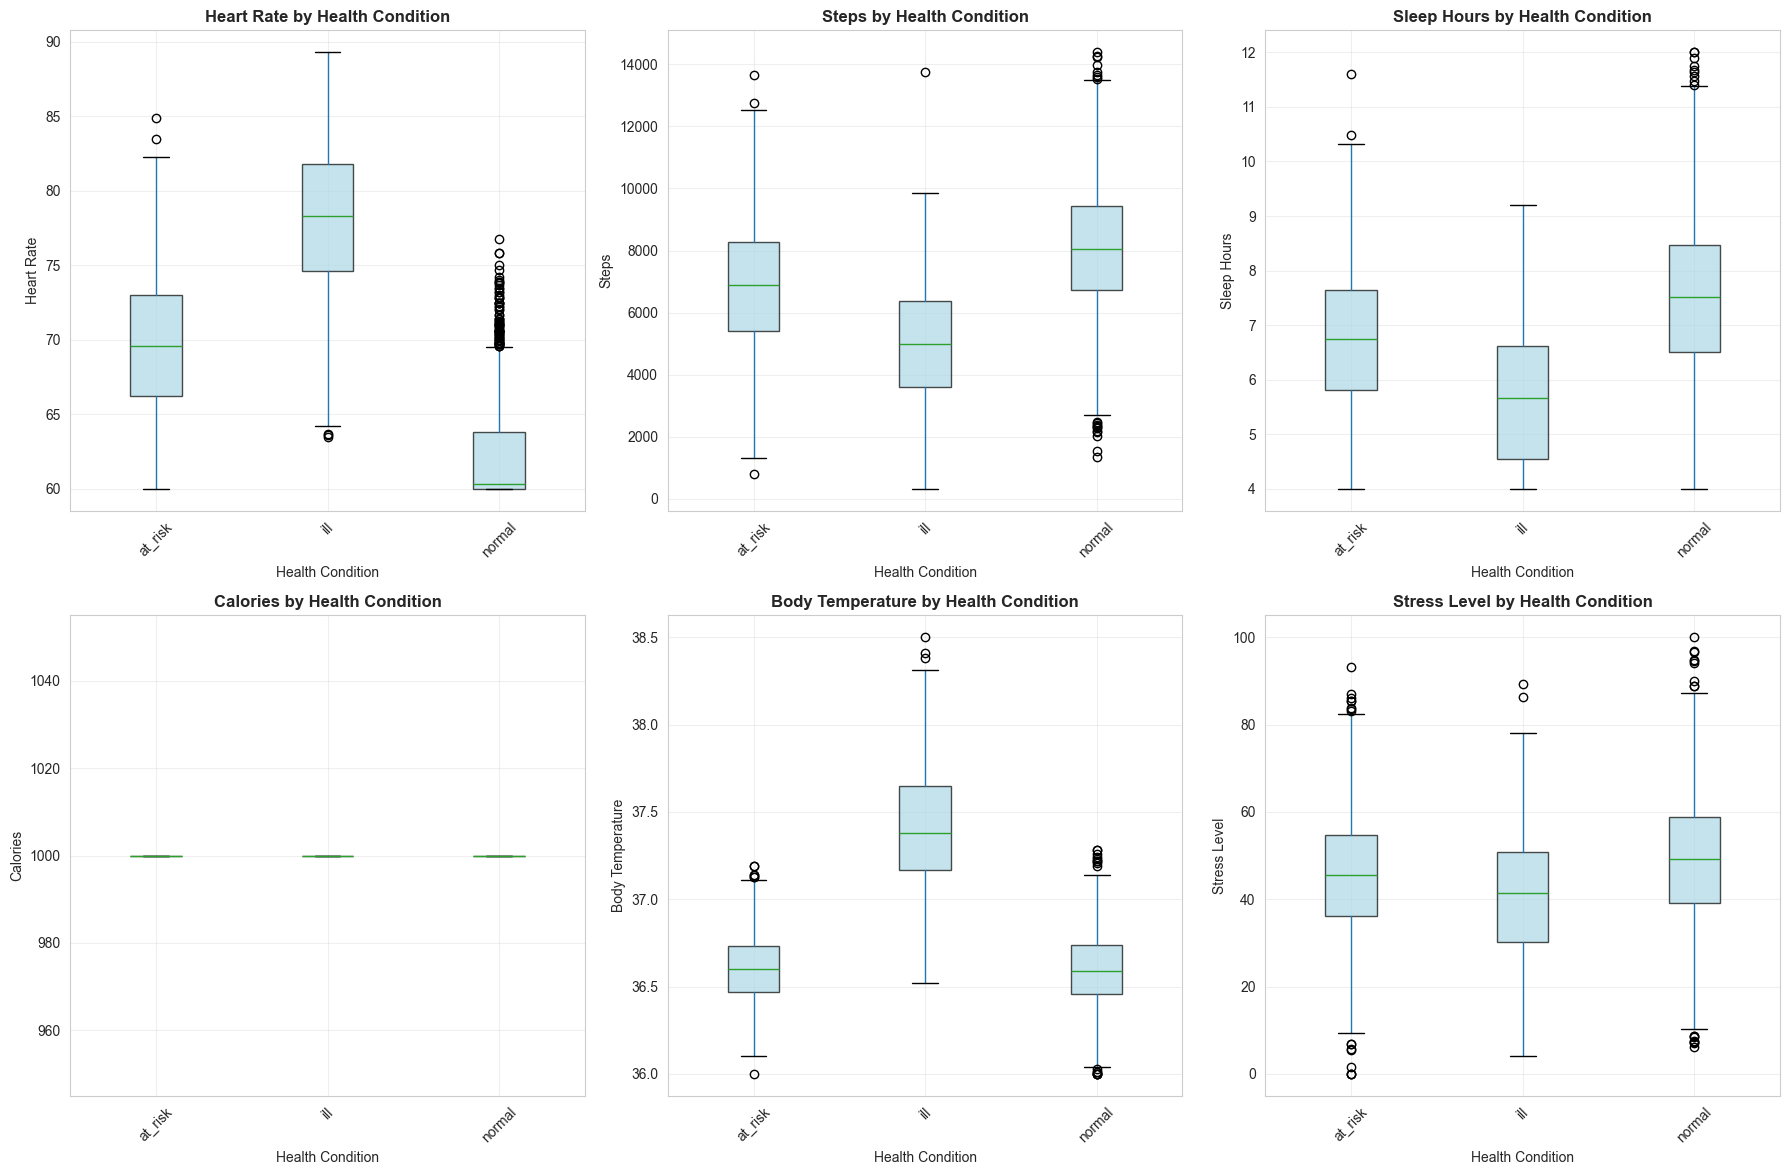

In [ ]:
# Box plots comparing features across health conditions
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for idx, feature in enumerate(numeric_features):
    ax = axes[idx]
    df.boxplot(column=feature, by='health_condition', ax=ax, 
               patch_artist=True, 
               boxprops=dict(facecolor='lightblue', alpha=0.7))
    ax.set_title(f'{feature.replace("_", " ").title()} by Health Condition', fontweight='bold')
    ax.set_xlabel('Health Condition')
    ax.set_ylabel(feature.replace("_", " ").title())
    plt.setp(ax.get_xticklabels(), rotation=45)
    ax.grid(alpha=0.3)

plt.suptitle('')
plt.tight_layout()
plt.show()


## Feature Engineering

Creating additional features that might be useful for modeling:


In [ ]:
# Create engineered features
df_fe = df.copy()

# Time-based features
df_fe['hour'] = df_fe['timestamp'].dt.hour
df_fe['day_of_week'] = df_fe['timestamp'].dt.dayofweek
df_fe['is_weekend'] = (df_fe['day_of_week'] >= 5).astype(int)

# Activity level based on steps
df_fe['activity_level'] = pd.cut(df_fe['steps'], 
                                  bins=[0, 3000, 7000, 10000, float('inf')],
                                  labels=['low', 'moderate', 'high', 'very_high'])

# Heart rate zones
df_fe['hr_zone'] = pd.cut(df_fe['heart_rate'],
                          bins=[0, 60, 100, 140, float('inf')],
                          labels=['resting', 'normal', 'elevated', 'high'])

# Sleep quality (based on hours)
df_fe['sleep_quality'] = pd.cut(df_fe['sleep_hours'],
                                bins=[0, 5, 7, 9, float('inf')],
                                labels=['poor', 'fair', 'good', 'excellent'])

# Combined health score (lower is better)
df_fe['health_score'] = (
    (df_fe['heart_rate'] - 70) / 10 +  # Normalized heart rate deviation
    (100 - df_fe['stress_level']) / 10 +  # Inverted stress
    abs(df_fe['body_temperature'] - 36.6) * 5  # Temperature deviation
)

print("Engineered features created!")
print(f"\nNew columns: {[col for col in df_fe.columns if col not in df.columns]}")
print(f"\nShape: {df_fe.shape}")


Engineered features created!

New columns: ['hour', 'day_of_week', 'is_weekend', 'activity_level', 'hr_zone', 'sleep_quality', 'health_score']

Shape: (3000, 18)


## Summary and Insights

Key findings from the EDA:


In [ ]:
# Summary statistics by health condition
summary_stats = df_fe.groupby('health_condition')[numeric_features].agg(['mean', 'std', 'min', 'max'])
print("Summary Statistics by Health Condition:")
print(summary_stats)


Summary Statistics by Health Condition:
                 heart_rate                              steps               \
                       mean       std   min   max         mean          std   
health_condition                                                              
at_risk           69.731373  4.912303  60.0  84.9  6853.774510  2076.592613   
ill               78.205556  5.074003  63.5  89.3  4982.759259  1960.621411   
normal            62.218739  3.107217  60.0  76.8  8059.946396  1995.434332   

                              sleep_hours            ... calories        \
                   min    max        mean       std  ...      min   max   
health_condition                                     ...                  
at_risk            812  13657    6.748529  1.407742  ...     1000  1000   
ill                321  13758    5.726852  1.318201  ...     1000  1000   
normal            1340  14386    7.499486  1.471459  ...     1000  1000   

                 body_temperature 